In [1]:
import pandas as pd
import nltk

# Unduh NLTK
nltk.download('punkt')

# Baca data dari file CSV
try:
    df = pd.read_csv('scrapped_data.csv')
    print(df.head())  
except Exception as e:
    print(f"Error saat membaca file: {e}")


                                             content  Layanan  Transaksi  \
0  Mohon di pertahankan layanannya, yang awalnya ...        1          0   
1  Masa buat transfer gk bisa, di suruh cek saldo...        0         -1   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...        0          0   
3  Lama banget kalo kirim uang dari e commerce, k...       -1         -1   
4  Kenapa sudah gak bisa dibuka BSI mobile nya? P...        0          0   

   Performa Aplikasi  Keamanan  
0                  0        -1  
1                  0         0  
2                 -1         0  
3                  0         0  
4                 -1         0  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
content=df

# 1. Preprocessing

## a. Cleaning Text

In [3]:
import pandas as pd
import re

# Fungsi membersihkan teks
def clean_text(text):
    text = re.sub(r'[²³¹⁰⁴⁵⁶⁷⁸⁹]', '', text)  # Menghapus angka pangkat/superscript
    text = re.sub(r'\d+', '', text)           # Menghapus angka biasa
    text = re.sub(r'[^\w\s]', ' ', text)      # Mengganti tanda baca dengan spasi
    text = re.sub(r'\s+', ' ', text)          # Menghapus spasi berlebih
    text = text.strip()                       # Menghapus spasi di awal dan akhir
    return text

In [4]:
# Terapkan fungsi clean_text ke kolom 'content'
content['cleaned_content'] = df['content'].apply(clean_text)
df = content['cleaned_content']

In [5]:
content.head(10)

,content,Layanan,Transaksi,Performa Aplikasi,Keamanan,cleaned_content
0,"Mohon di pertahankan layanannya, yang awalnya ...",1,0,0,-1,Mohon di pertahankan layanannya yang awalnya k...
1,"Masa buat transfer gk bisa, di suruh cek saldo...",0,-1,0,0,Masa buat transfer gk bisa di suruh cek saldo ...
2,Kenapa aplikasinya tidak bisa dibuka padahal w...,0,0,-1,0,Kenapa aplikasinya tidak bisa dibuka padahal w...
3,"Lama banget kalo kirim uang dari e commerce, k...",-1,-1,0,0,Lama banget kalo kirim uang dari e commerce ka...
4,Kenapa sudah gak bisa dibuka BSI mobile nya? P...,0,0,-1,0,Kenapa sudah gak bisa dibuka BSI mobile nya Pa...
5,Apaan ni apk..meng aktifkan nya sangat ribet s...,-1,0,-1,0,Apaan ni apk meng aktifkan nya sangat ribet se...
6,Kenapa ya kak habis saat membuat kata sandi me...,0,0,-1,0,Kenapa ya kak habis saat membuat kata sandi me...
7,perbaiki lagi BSI mobile. Kadang gk mau bisa m...,0,0,-1,0,perbaiki lagi BSI mobile Kadang gk mau bisa ma...
8,Aplikasi bank paling jelek dan ga jelas..beli ...,0,-1,-1,0,Aplikasi bank paling jelek dan ga jelas beli t...
9,Ini kenapa yaa saya transaksi pembayaran wifi ...,-1,-1,0,0,Ini kenapa yaa saya transaksi pembayaran wifi ...


## b. Case Folding

In [6]:
# Fungsi case folding
def case_folding(text):
    return text.lower()

# Terapkan ke kolom hasil cleaning
content['folded'] = content['cleaned_content'].apply(case_folding)
df = content['folded']

In [7]:
content.head(10)

,content,Layanan,Transaksi,Performa Aplikasi,Keamanan,cleaned_content,folded
0,"Mohon di pertahankan layanannya, yang awalnya ...",1,0,0,-1,Mohon di pertahankan layanannya yang awalnya k...,mohon di pertahankan layanannya yang awalnya k...
1,"Masa buat transfer gk bisa, di suruh cek saldo...",0,-1,0,0,Masa buat transfer gk bisa di suruh cek saldo ...,masa buat transfer gk bisa di suruh cek saldo ...
2,Kenapa aplikasinya tidak bisa dibuka padahal w...,0,0,-1,0,Kenapa aplikasinya tidak bisa dibuka padahal w...,kenapa aplikasinya tidak bisa dibuka padahal w...
3,"Lama banget kalo kirim uang dari e commerce, k...",-1,-1,0,0,Lama banget kalo kirim uang dari e commerce ka...,lama banget kalo kirim uang dari e commerce ka...
4,Kenapa sudah gak bisa dibuka BSI mobile nya? P...,0,0,-1,0,Kenapa sudah gak bisa dibuka BSI mobile nya Pa...,kenapa sudah gak bisa dibuka bsi mobile nya pa...
5,Apaan ni apk..meng aktifkan nya sangat ribet s...,-1,0,-1,0,Apaan ni apk meng aktifkan nya sangat ribet se...,apaan ni apk meng aktifkan nya sangat ribet se...
6,Kenapa ya kak habis saat membuat kata sandi me...,0,0,-1,0,Kenapa ya kak habis saat membuat kata sandi me...,kenapa ya kak habis saat membuat kata sandi me...
7,perbaiki lagi BSI mobile. Kadang gk mau bisa m...,0,0,-1,0,perbaiki lagi BSI mobile Kadang gk mau bisa ma...,perbaiki lagi bsi mobile kadang gk mau bisa ma...
8,Aplikasi bank paling jelek dan ga jelas..beli ...,0,-1,-1,0,Aplikasi bank paling jelek dan ga jelas beli t...,aplikasi bank paling jelek dan ga jelas beli t...
9,Ini kenapa yaa saya transaksi pembayaran wifi ...,-1,-1,0,0,Ini kenapa yaa saya transaksi pembayaran wifi ...,ini kenapa yaa saya transaksi pembayaran wifi ...


## c. Tokenizing

In [8]:
from nltk.tokenize import word_tokenize

# Tokenisasi
content['tokens'] = content['folded'].apply(word_tokenize)

In [9]:
content

,content,Layanan,Transaksi,Performa Aplikasi,Keamanan,cleaned_content,folded,tokens
0,"Mohon di pertahankan layanannya, yang awalnya ...",1,0,0,-1,Mohon di pertahankan layanannya yang awalnya k...,mohon di pertahankan layanannya yang awalnya k...,"[mohon, di, pertahankan, layanannya, yang, awa..."
1,"Masa buat transfer gk bisa, di suruh cek saldo...",0,-1,0,0,Masa buat transfer gk bisa di suruh cek saldo ...,masa buat transfer gk bisa di suruh cek saldo ...,"[masa, buat, transfer, gk, bisa, di, suruh, ce..."
2,Kenapa aplikasinya tidak bisa dibuka padahal w...,0,0,-1,0,Kenapa aplikasinya tidak bisa dibuka padahal w...,kenapa aplikasinya tidak bisa dibuka padahal w...,"[kenapa, aplikasinya, tidak, bisa, dibuka, pad..."
3,"Lama banget kalo kirim uang dari e commerce, k...",-1,-1,0,0,Lama banget kalo kirim uang dari e commerce ka...,lama banget kalo kirim uang dari e commerce ka...,"[lama, banget, kalo, kirim, uang, dari, e, com..."
4,Kenapa sudah gak bisa dibuka BSI mobile nya? P...,0,0,-1,0,Kenapa sudah gak bisa dibuka BSI mobile nya Pa...,kenapa sudah gak bisa dibuka bsi mobile nya pa...,"[kenapa, sudah, gak, bisa, dibuka, bsi, mobile..."
...,...,...,...,...,...,...,...,...
1721,Sangat disayangkan. Di HP sy RAM 3GB aplikasi ...,0,0,-1,0,Sangat disayangkan Di HP sy RAM GB aplikasi in...,sangat disayangkan di hp sy ram gb aplikasi in...,"[sangat, disayangkan, di, hp, sy, ram, gb, apl..."
1722,"Aplikasinya susah banget, ribet, kebanyakan ma...",0,-1,-1,-1,Aplikasinya susah banget ribet kebanyakan masu...,aplikasinya susah banget ribet kebanyakan masu...,"[aplikasinya, susah, banget, ribet, kebanyakan..."
1723,Sudah berbulan2 kalo transfer dari rekening BS...,0,-1,0,0,Sudah berbulan kalo transfer dari rekening BSM...,sudah berbulan kalo transfer dari rekening bsm...,"[sudah, berbulan, kalo, transfer, dari, rekeni..."
1724,Sampai saat ini blum bisa digunakan aplikasi i...,0,-1,-1,0,Sampai saat ini blum bisa digunakan aplikasi i...,sampai saat ini blum bisa digunakan aplikasi i...,"[sampai, saat, ini, blum, bisa, digunakan, apl..."


In [10]:
df=content['tokens']

## c. Normalisasi

In [11]:
import pandas as pd

normalized_word = pd.read_csv("normalisasi.csv", encoding='latin1')

normalized_word_dict = {}
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

content['normalisasi'] = content['tokens'].apply(normalized_term)
content.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_9924\920888507.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
C:\Users\HP\AppData\Local\Temp\ipykernel_9924\920888507.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


,content,Layanan,Transaksi,Performa Aplikasi,Keamanan,cleaned_content,folded,tokens,normalisasi
0,"Mohon di pertahankan layanannya, yang awalnya ...",1,0,0,-1,Mohon di pertahankan layanannya yang awalnya k...,mohon di pertahankan layanannya yang awalnya k...,"[mohon, di, pertahankan, layanannya, yang, awa...","[mohon, di, pertahankan, layanannya, yang, awa..."
1,"Masa buat transfer gk bisa, di suruh cek saldo...",0,-1,0,0,Masa buat transfer gk bisa di suruh cek saldo ...,masa buat transfer gk bisa di suruh cek saldo ...,"[masa, buat, transfer, gk, bisa, di, suruh, ce...","[masa, buat, transfer, tidak, bisa, di, suruh,..."
2,Kenapa aplikasinya tidak bisa dibuka padahal w...,0,0,-1,0,Kenapa aplikasinya tidak bisa dibuka padahal w...,kenapa aplikasinya tidak bisa dibuka padahal w...,"[kenapa, aplikasinya, tidak, bisa, dibuka, pad...","[kenapa, aplikasinya, tidak, bisa, dibuka, pad..."
3,"Lama banget kalo kirim uang dari e commerce, k...",-1,-1,0,0,Lama banget kalo kirim uang dari e commerce ka...,lama banget kalo kirim uang dari e commerce ka...,"[lama, banget, kalo, kirim, uang, dari, e, com...","[lama, sekali, kalau, kirim, uang, dari, e, co..."
4,Kenapa sudah gak bisa dibuka BSI mobile nya? P...,0,0,-1,0,Kenapa sudah gak bisa dibuka BSI mobile nya Pa...,kenapa sudah gak bisa dibuka bsi mobile nya pa...,"[kenapa, sudah, gak, bisa, dibuka, bsi, mobile...","[kenapa, sudah, tidak, bisa, dibuka, bsi, mobi..."
5,Apaan ni apk..meng aktifkan nya sangat ribet s...,-1,0,-1,0,Apaan ni apk meng aktifkan nya sangat ribet se...,apaan ni apk meng aktifkan nya sangat ribet se...,"[apaan, ni, apk, meng, aktifkan, nya, sangat, ...","[apa, ini, aplikasi, meng, aktifkan, nya, sang..."
6,Kenapa ya kak habis saat membuat kata sandi me...,0,0,-1,0,Kenapa ya kak habis saat membuat kata sandi me...,kenapa ya kak habis saat membuat kata sandi me...,"[kenapa, ya, kak, habis, saat, membuat, kata, ...","[kenapa, iya, kak, setelah, saat, membuat, kat..."
7,perbaiki lagi BSI mobile. Kadang gk mau bisa m...,0,0,-1,0,perbaiki lagi BSI mobile Kadang gk mau bisa ma...,perbaiki lagi bsi mobile kadang gk mau bisa ma...,"[perbaiki, lagi, bsi, mobile, kadang, gk, mau,...","[perbaiki, lagi, bsi, mobile, kadang, tidak, m..."
8,Aplikasi bank paling jelek dan ga jelas..beli ...,0,-1,-1,0,Aplikasi bank paling jelek dan ga jelas beli t...,aplikasi bank paling jelek dan ga jelas beli t...,"[aplikasi, bank, paling, jelek, dan, ga, jelas...","[aplikasi, bank, paling, jelek, dan, tidak, je..."
9,Ini kenapa yaa saya transaksi pembayaran wifi ...,-1,-1,0,0,Ini kenapa yaa saya transaksi pembayaran wifi ...,ini kenapa yaa saya transaksi pembayaran wifi ...,"[ini, kenapa, yaa, saya, transaksi, pembayaran...","[ini, kenapa, iya, saya, transaksi, pembayaran..."


In [12]:
df=content['normalisasi']

In [13]:
#content.to_excel('steamming.xlsx', index=False)
#content[['content','cleaned_content','folded','tokens', 'normalisasi']].to_excel('data_bersih.xlsx', index=False)

## d. Convert Negasi

In [14]:
import pandas as pd
import ast 

# Daftar kata negasi umum
negations = ['tidak', 'gak', 'nggak', 'never']

# Fungsi untuk menangani negasi dalam daftar token
def handle_negation(tokens):
    processed_tokens = []
    is_negation = False
    
    for token in tokens:
        if token in negations:
            is_negation = True
        else:
            if is_negation:
                processed_tokens.append(f"tidak_{token}")  # Format penambahan negasi
                is_negation = False
            else:
                processed_tokens.append(token)
    
    if is_negation:  # Jika akhir kalimat adalah negasi
        processed_tokens.append("tidak")
    
    return processed_tokens

# Pastikan kolom 'normalisasi' sudah berbentuk list
content['normalisasi'] = content['normalisasi'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Terapkan fungsi negasi
content['convert_negasi'] = content['normalisasi'].apply(handle_negation)

content.head(10)

,content,Layanan,Transaksi,Performa Aplikasi,Keamanan,cleaned_content,folded,tokens,normalisasi,convert_negasi
0,"Mohon di pertahankan layanannya, yang awalnya ...",1,0,0,-1,Mohon di pertahankan layanannya yang awalnya k...,mohon di pertahankan layanannya yang awalnya k...,"[mohon, di, pertahankan, layanannya, yang, awa...","[mohon, di, pertahankan, layanannya, yang, awa...","[mohon, di, pertahankan, layanannya, yang, awa..."
1,"Masa buat transfer gk bisa, di suruh cek saldo...",0,-1,0,0,Masa buat transfer gk bisa di suruh cek saldo ...,masa buat transfer gk bisa di suruh cek saldo ...,"[masa, buat, transfer, gk, bisa, di, suruh, ce...","[masa, buat, transfer, tidak, bisa, di, suruh,...","[masa, buat, transfer, tidak_bisa, di, suruh, ..."
2,Kenapa aplikasinya tidak bisa dibuka padahal w...,0,0,-1,0,Kenapa aplikasinya tidak bisa dibuka padahal w...,kenapa aplikasinya tidak bisa dibuka padahal w...,"[kenapa, aplikasinya, tidak, bisa, dibuka, pad...","[kenapa, aplikasinya, tidak, bisa, dibuka, pad...","[kenapa, aplikasinya, tidak_bisa, dibuka, pada..."
3,"Lama banget kalo kirim uang dari e commerce, k...",-1,-1,0,0,Lama banget kalo kirim uang dari e commerce ka...,lama banget kalo kirim uang dari e commerce ka...,"[lama, banget, kalo, kirim, uang, dari, e, com...","[lama, sekali, kalau, kirim, uang, dari, e, co...","[lama, sekali, kalau, kirim, uang, dari, e, co..."
4,Kenapa sudah gak bisa dibuka BSI mobile nya? P...,0,0,-1,0,Kenapa sudah gak bisa dibuka BSI mobile nya Pa...,kenapa sudah gak bisa dibuka bsi mobile nya pa...,"[kenapa, sudah, gak, bisa, dibuka, bsi, mobile...","[kenapa, sudah, tidak, bisa, dibuka, bsi, mobi...","[kenapa, sudah, tidak_bisa, dibuka, bsi, mobil..."
5,Apaan ni apk..meng aktifkan nya sangat ribet s...,-1,0,-1,0,Apaan ni apk meng aktifkan nya sangat ribet se...,apaan ni apk meng aktifkan nya sangat ribet se...,"[apaan, ni, apk, meng, aktifkan, nya, sangat, ...","[apa, ini, aplikasi, meng, aktifkan, nya, sang...","[apa, ini, aplikasi, meng, aktifkan, nya, sang..."
6,Kenapa ya kak habis saat membuat kata sandi me...,0,0,-1,0,Kenapa ya kak habis saat membuat kata sandi me...,kenapa ya kak habis saat membuat kata sandi me...,"[kenapa, ya, kak, habis, saat, membuat, kata, ...","[kenapa, iya, kak, setelah, saat, membuat, kat...","[kenapa, iya, kak, setelah, saat, membuat, kat..."
7,perbaiki lagi BSI mobile. Kadang gk mau bisa m...,0,0,-1,0,perbaiki lagi BSI mobile Kadang gk mau bisa ma...,perbaiki lagi bsi mobile kadang gk mau bisa ma...,"[perbaiki, lagi, bsi, mobile, kadang, gk, mau,...","[perbaiki, lagi, bsi, mobile, kadang, tidak, m...","[perbaiki, lagi, bsi, mobile, kadang, tidak_ma..."
8,Aplikasi bank paling jelek dan ga jelas..beli ...,0,-1,-1,0,Aplikasi bank paling jelek dan ga jelas beli t...,aplikasi bank paling jelek dan ga jelas beli t...,"[aplikasi, bank, paling, jelek, dan, ga, jelas...","[aplikasi, bank, paling, jelek, dan, tidak, je...","[aplikasi, bank, paling, jelek, dan, tidak_jel..."
9,Ini kenapa yaa saya transaksi pembayaran wifi ...,-1,-1,0,0,Ini kenapa yaa saya transaksi pembayaran wifi ...,ini kenapa yaa saya transaksi pembayaran wifi ...,"[ini, kenapa, yaa, saya, transaksi, pembayaran...","[ini, kenapa, iya, saya, transaksi, pembayaran...","[ini, kenapa, iya, saya, transaksi, pembayaran..."


In [15]:
df=content['convert_negasi']

## e. Stopwords


In [16]:
from nltk.corpus import stopwords
import nltk

# Unduh stopwords untuk bahasa Indonesia
nltk.download('stopwords')

# Ambil stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Membaca stopwords tambahan dari file 'combined_stop_words.txt'
with open('combined_stop_words.txt', 'r') as f:
    additional_stopwords = [line.strip() for line in f.readlines()]

# Gabungkan stopwords dengan kata-kata tambahan
stop_words.update(additional_stopwords)

# Fungsi untuk menghapus stopwords dari token
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Terapkan fungsi remove_stopwords
content['filtered_tokens'] = content['convert_negasi'].apply(remove_stopwords)

content.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,Layanan,Transaksi,Performa Aplikasi,Keamanan,cleaned_content,folded,tokens,normalisasi,convert_negasi,filtered_tokens
0,"Mohon di pertahankan layanannya, yang awalnya ...",1,0,0,-1,Mohon di pertahankan layanannya yang awalnya k...,mohon di pertahankan layanannya yang awalnya k...,"[mohon, di, pertahankan, layanannya, yang, awa...","[mohon, di, pertahankan, layanannya, yang, awa...","[mohon, di, pertahankan, layanannya, yang, awa...","[pertahankan, layanannya, kesulitan, aktivasi,..."
1,"Masa buat transfer gk bisa, di suruh cek saldo...",0,-1,0,0,Masa buat transfer gk bisa di suruh cek saldo ...,masa buat transfer gk bisa di suruh cek saldo ...,"[masa, buat, transfer, gk, bisa, di, suruh, ce...","[masa, buat, transfer, tidak, bisa, di, suruh,...","[masa, buat, transfer, tidak_bisa, di, suruh, ...","[transfer, tidak_bisa, cek, saldo, saldonya]"
2,Kenapa aplikasinya tidak bisa dibuka padahal w...,0,0,-1,0,Kenapa aplikasinya tidak bisa dibuka padahal w...,kenapa aplikasinya tidak bisa dibuka padahal w...,"[kenapa, aplikasinya, tidak, bisa, dibuka, pad...","[kenapa, aplikasinya, tidak, bisa, dibuka, pad...","[kenapa, aplikasinya, tidak_bisa, dibuka, pada...","[aplikasinya, tidak_bisa, lancar, lancar, lanc..."
3,"Lama banget kalo kirim uang dari e commerce, k...",-1,-1,0,0,Lama banget kalo kirim uang dari e commerce ka...,lama banget kalo kirim uang dari e commerce ka...,"[lama, banget, kalo, kirim, uang, dari, e, com...","[lama, sekali, kalau, kirim, uang, dari, e, co...","[lama, sekali, kalau, kirim, uang, dari, e, co...","[uang, rekening, tarik, cardless, tidak_jelas,..."
4,Kenapa sudah gak bisa dibuka BSI mobile nya? P...,0,0,-1,0,Kenapa sudah gak bisa dibuka BSI mobile nya Pa...,kenapa sudah gak bisa dibuka bsi mobile nya pa...,"[kenapa, sudah, gak, bisa, dibuka, bsi, mobile...","[kenapa, sudah, tidak, bisa, dibuka, bsi, mobi...","[kenapa, sudah, tidak_bisa, dibuka, bsi, mobil...","[tidak_bisa, mobile, transaksi, lancar, kehabi..."
5,Apaan ni apk..meng aktifkan nya sangat ribet s...,-1,0,-1,0,Apaan ni apk meng aktifkan nya sangat ribet se...,apaan ni apk meng aktifkan nya sangat ribet se...,"[apaan, ni, apk, meng, aktifkan, nya, sangat, ...","[apa, ini, aplikasi, meng, aktifkan, nya, sang...","[apa, ini, aplikasi, meng, aktifkan, nya, sang...","[aplikasi, aktifkan, rumit, wajah, usahakan, r..."
6,Kenapa ya kak habis saat membuat kata sandi me...,0,0,-1,0,Kenapa ya kak habis saat membuat kata sandi me...,kenapa ya kak habis saat membuat kata sandi me...,"[kenapa, ya, kak, habis, saat, membuat, kata, ...","[kenapa, iya, kak, setelah, saat, membuat, kat...","[kenapa, iya, kak, setelah, saat, membuat, kat...","[sandi, menu, login, close, overlapping, pop up]"
7,perbaiki lagi BSI mobile. Kadang gk mau bisa m...,0,0,-1,0,perbaiki lagi BSI mobile Kadang gk mau bisa ma...,perbaiki lagi bsi mobile kadang gk mau bisa ma...,"[perbaiki, lagi, bsi, mobile, kadang, gk, mau,...","[perbaiki, lagi, bsi, mobile, kadang, tidak, m...","[perbaiki, lagi, bsi, mobile, kadang, tidak_ma...","[perbaiki, mobile, tidak_mau, aplikasi]"
8,Aplikasi bank paling jelek dan ga jelas..beli ...,0,-1,-1,0,Aplikasi bank paling jelek dan ga jelas beli t...,aplikasi bank paling jelek dan ga jelas beli t...,"[aplikasi, bank, paling, jelek, dan, ga, jelas...","[aplikasi, bank, paling, jelek, dan, tidak, je...","[aplikasi, bank, paling, jelek, dan, tidak_jel...","[aplikasi, bank, jelek, tidak_jelas, beli, tok..."
9,Ini kenapa yaa saya transaksi pembayaran wifi ...,-1,-1,0,0,Ini kenapa yaa saya transaksi pembayaran wifi ...,ini kenapa yaa saya transaksi pembayaran wifi ...,"[ini, kenapa, yaa, saya, transaksi, pembayaran...","[ini, kenapa, iya, saya, transaksi, pembayaran...","[ini, kenapa, iya, saya, transaksi, pembayaran...","[transaksi, pembayaran, internet, mobile, gaga..."


## f. Stemming

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming token dengan pengecekan "_"
def stem_tokens(tokens):
    stemmed = []
    for word in tokens:
        if "_" in word: 
            stemmed.append(word)
        else:
            stemmed.append(stemmer.stem(word))
    return stemmed

# Terapkan ke kolom
content['stemmed_tokens'] = content['filtered_tokens'].apply(stem_tokens)
content.head(10)

,content,Layanan,Transaksi,Performa Aplikasi,Keamanan,cleaned_content,folded,tokens,normalisasi,convert_negasi,filtered_tokens,stemmed_tokens
0,"Mohon di pertahankan layanannya, yang awalnya ...",1,0,0,-1,Mohon di pertahankan layanannya yang awalnya k...,mohon di pertahankan layanannya yang awalnya k...,"[mohon, di, pertahankan, layanannya, yang, awa...","[mohon, di, pertahankan, layanannya, yang, awa...","[mohon, di, pertahankan, layanannya, yang, awa...","[pertahankan, layanannya, kesulitan, aktivasi,...","[tahan, layan, sulit, aktivasi, potret, wajah,..."
1,"Masa buat transfer gk bisa, di suruh cek saldo...",0,-1,0,0,Masa buat transfer gk bisa di suruh cek saldo ...,masa buat transfer gk bisa di suruh cek saldo ...,"[masa, buat, transfer, gk, bisa, di, suruh, ce...","[masa, buat, transfer, tidak, bisa, di, suruh,...","[masa, buat, transfer, tidak_bisa, di, suruh, ...","[transfer, tidak_bisa, cek, saldo, saldonya]","[transfer, tidak_bisa, cek, saldo, saldo]"
2,Kenapa aplikasinya tidak bisa dibuka padahal w...,0,0,-1,0,Kenapa aplikasinya tidak bisa dibuka padahal w...,kenapa aplikasinya tidak bisa dibuka padahal w...,"[kenapa, aplikasinya, tidak, bisa, dibuka, pad...","[kenapa, aplikasinya, tidak, bisa, dibuka, pad...","[kenapa, aplikasinya, tidak_bisa, dibuka, pada...","[aplikasinya, tidak_bisa, lancar, lancar, lanc...","[aplikasi, tidak_bisa, lancar, lancar, lancar,..."
3,"Lama banget kalo kirim uang dari e commerce, k...",-1,-1,0,0,Lama banget kalo kirim uang dari e commerce ka...,lama banget kalo kirim uang dari e commerce ka...,"[lama, banget, kalo, kirim, uang, dari, e, com...","[lama, sekali, kalau, kirim, uang, dari, e, co...","[lama, sekali, kalau, kirim, uang, dari, e, co...","[uang, rekening, tarik, cardless, tidak_jelas,...","[uang, rekening, tarik, cardless, tidak_jelas,..."
4,Kenapa sudah gak bisa dibuka BSI mobile nya? P...,0,0,-1,0,Kenapa sudah gak bisa dibuka BSI mobile nya Pa...,kenapa sudah gak bisa dibuka bsi mobile nya pa...,"[kenapa, sudah, gak, bisa, dibuka, bsi, mobile...","[kenapa, sudah, tidak, bisa, dibuka, bsi, mobi...","[kenapa, sudah, tidak_bisa, dibuka, bsi, mobil...","[tidak_bisa, mobile, transaksi, lancar, kehabi...","[tidak_bisa, mobile, transaksi, lancar, habis]"
5,Apaan ni apk..meng aktifkan nya sangat ribet s...,-1,0,-1,0,Apaan ni apk meng aktifkan nya sangat ribet se...,apaan ni apk meng aktifkan nya sangat ribet se...,"[apaan, ni, apk, meng, aktifkan, nya, sangat, ...","[apa, ini, aplikasi, meng, aktifkan, nya, sang...","[apa, ini, aplikasi, meng, aktifkan, nya, sang...","[aplikasi, aktifkan, rumit, wajah, usahakan, r...","[aplikasi, aktif, rumit, wajah, usaha, rumit, ..."
6,Kenapa ya kak habis saat membuat kata sandi me...,0,0,-1,0,Kenapa ya kak habis saat membuat kata sandi me...,kenapa ya kak habis saat membuat kata sandi me...,"[kenapa, ya, kak, habis, saat, membuat, kata, ...","[kenapa, iya, kak, setelah, saat, membuat, kat...","[kenapa, iya, kak, setelah, saat, membuat, kat...","[sandi, menu, login, close, overlapping, pop up]","[sandi, menu, login, close, overlapping, pop up]"
7,perbaiki lagi BSI mobile. Kadang gk mau bisa m...,0,0,-1,0,perbaiki lagi BSI mobile Kadang gk mau bisa ma...,perbaiki lagi bsi mobile kadang gk mau bisa ma...,"[perbaiki, lagi, bsi, mobile, kadang, gk, mau,...","[perbaiki, lagi, bsi, mobile, kadang, tidak, m...","[perbaiki, lagi, bsi, mobile, kadang, tidak_ma...","[perbaiki, mobile, tidak_mau, aplikasi]","[baik, mobile, tidak_mau, aplikasi]"
8,Aplikasi bank paling jelek dan ga jelas..beli ...,0,-1,-1,0,Aplikasi bank paling jelek dan ga jelas beli t...,aplikasi bank paling jelek dan ga jelas beli t...,"[aplikasi, bank, paling, jelek, dan, ga, jelas...","[aplikasi, bank, paling, jelek, dan, tidak, je...","[aplikasi, bank, paling, jelek, dan, tidak_jel...","[aplikasi, bank, jelek, tidak_jelas, beli, tok...","[aplikasi, bank, jelek, tidak_jelas, beli, tok..."
9,Ini kenapa yaa saya transaksi pembayaran wifi ...,-1,-1,0,0,Ini kenapa yaa saya transaksi pembayaran

In [18]:
# Gabungkan token menjadi string
content['processed_text'] = content['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

In [19]:
#content.to_excel('steamming.xlsx', index=False)
#content[['content','cleaned_content','folded','tokens', 'normalisasi','convert_negasi','filtered_tokens','stemmed_tokens','processed_text']].to_excel('data_bersih.xlsx', index=False)

## Word Cloud

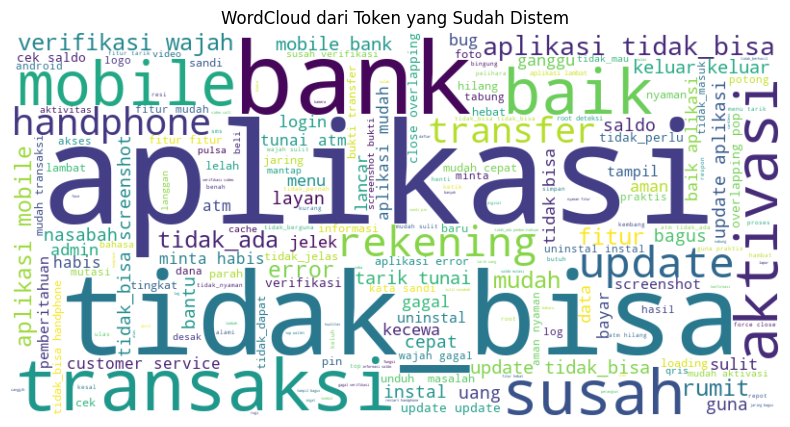

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua token yang telah distem menjadi satu string besar
all_stemmed_text = content['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens)).str.cat(sep=' ')

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_stemmed_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Token yang Sudah Distem')
plt.show()


# 2. Split Dataset

In [21]:
from sklearn.model_selection import train_test_split

aspek_columns = ['Layanan', 'Transaksi', 'Performa Aplikasi', 'Keamanan']
aspek_columns = [col for col in aspek_columns if col in content.columns]

X = content['processed_text']
y = content[aspek_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Latih: {len(X_train)}, Uji: {len(X_test)}')
print("Kolom y_train:", y_train.columns.tolist())

Latih: 1208, Uji: 518
Kolom y_train: ['Layanan', 'Transaksi', 'Performa Aplikasi', 'Keamanan']


# 3. Ekstraksi Fitur

In [22]:
import math
from collections import Counter
import pandas as pd
import joblib

# Tokenisasi dokumen
tokenized_docs_train = [doc.split() for doc in X_train]
tokenized_docs_test = [doc.split() for doc in X_test]

# Menggabungkan semua kata unik dari dokumen latih
all_words = list(set(word for doc in tokenized_docs_train for word in doc))

joblib.dump(all_words, 'tfidf_features.joblib')  

# Menghitung Document Frequency (DF)
df = {word: sum(1 for doc in tokenized_docs_train if word in doc) for word in all_words}

# Menghitung Inverse Document Frequency (IDF) dengan rumus IDFₜ = log(N / DFₜ)
num_documents = len(tokenized_docs_train)
idf = {word: math.log10(num_documents / df[word]) for word in all_words}

# Menghitung TF dan TF-IDF
def compute_tf_idf(documents, idf_values, all_words):
    tf_idf_results = []
    for doc in documents:
        tf = Counter(doc)  # Frekuensi mentah (F(t,d))
        tf_idf_result = {
            word: tf[word] * idf_values[word] if word in tf else 0
            for word in all_words
        }
        tf_idf_results.append(tf_idf_result)
    return tf_idf_results

# Hitung TF-IDF untuk data latih dan uji
tf_idf_results_train = compute_tf_idf(tokenized_docs_train, idf, all_words)
tf_idf_results_test = compute_tf_idf(tokenized_docs_test, idf, all_words)

# Membuat DataFrame
tfidf_df_train = pd.DataFrame(tf_idf_results_train, columns=all_words)
tfidf_df_test = pd.DataFrame(tf_idf_results_test, columns=all_words)

# Mengisi nilai kosong dengan 0
tfidf_df_train.fillna(0, inplace=True)
tfidf_df_test.fillna(0, inplace=True)

# Validasi hasil
print("TF-IDF Data Train Shape:", tfidf_df_train.shape)
print("TF-IDF Data Test Shape:", tfidf_df_test.shape)

TF-IDF Data Train Shape: (1208, 536)
TF-IDF Data Test Shape: (518, 536)


In [23]:
# Simpan hasil TF-IDF ke file Excel
#tfidf_df_train.to_excel("tfidf_train.xlsx", index=False)
#tfidf_df_test.to_excel("tfidf_test.xlsx", index=False)

# 5. SVM Modeling

In [24]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report
import numpy as np
import joblib

# Daftar aspek untuk klasifikasi
aspek_list = ['Layanan', 'Transaksi', 'Performa Aplikasi', 'Keamanan']

# Konversi DataFrame TF-IDF hasil manual ke array numpy
X_array = tfidf_df_train.to_numpy()

# Loop untuk setiap aspek
for aspect in aspek_list:
    print(f"\n📌 Hyperparameter Tuning SVM (One-vs-One) untuk aspek: {aspect}")

    # Ambil label target untuk aspek tersebut
    y_aspect = y_train[aspect].values

    # Buat pipeline SVM dengan OneVsOne
    pipeline = Pipeline([
        ('clf', OneVsOneClassifier(SVC(probability=True, random_state=42)))
    ])

    # Definisikan parameter grid untuk pencarian hyperparameter
    param_grid = [
        {
            'clf__estimator__kernel': ['linear'],
            'clf__estimator__C': [0.01, 0.1, 1, 10, 100],
        },
        {
            'clf__estimator__kernel': ['rbf'],
            'clf__estimator__C': [0.01, 0.1, 1, 10, 100],
            'clf__estimator__gamma': [0.001, 0.01, 0.1, 1, 10]
        },
        {
            'clf__estimator__kernel': ['poly'],
            'clf__estimator__C': [0.01, 0.1, 1, 10, 100],
            'clf__estimator__gamma': [0.001, 0.01, 0.1, 1, 10],
            'clf__estimator__degree': [2, 3]
        }
    ]

    # Lakukan GridSearchCV dengan 5-Fold cross-validation
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='f1_macro',
        verbose=1,
        n_jobs=-1
    )

    # Latih model dengan data TF-IDF dan label aspek
    grid_search.fit(X_array, y_aspect)

    # Cetak parameter terbaik
    print(f"✅ Best parameters untuk aspek {aspect}: {grid_search.best_params_}")

    # Evaluasi performa menggunakan prediksi silang (5 fold)
    print(f"📊 Evaluasi 5-Fold (cross_val_predict) untuk aspek {aspect}:")
    y_pred_cv = cross_val_predict(grid_search.best_estimator_, X_array, y_aspect, cv=5)
    print(classification_report(y_aspect, y_pred_cv))

    # Simpan model terbaik ke file
    joblib.dump(grid_search.best_estimator_, f"svm_model_{aspect}_ovo_tuned_5fold.joblib")


📌 Hyperparameter Tuning SVM (One-vs-One) untuk aspek: Layanan
Fitting 5 folds for each of 80 candidates, totalling 400 fits
✅ Best parameters untuk aspek Layanan: {'clf__estimator__C': 100, 'clf__estimator__gamma': 0.01, 'clf__estimator__kernel': 'rbf'}
📊 Evaluasi 5-Fold (cross_val_predict) untuk aspek Layanan:
              precision    recall  f1-score   support

          -1       0.60      0.50      0.55       299
           0       0.81      0.86      0.83       840
           1       0.56      0.51      0.53        69

    accuracy                           0.75      1208
   macro avg       0.66      0.62      0.64      1208
weighted avg       0.74      0.75      0.74      1208


📌 Hyperparameter Tuning SVM (One-vs-One) untuk aspek: Transaksi
Fitting 5 folds for each of 80 candidates, totalling 400 fits
✅ Best parameters untuk aspek Transaksi: {'clf__estimator__C': 100, 'clf__estimator__gamma': 0.001, 'clf__estimator__kernel': 'rbf'}
📊 Evaluasi 5-Fold (cross_val_predict) untuk a


📊 ROC-AUC untuk aspek: Layanan


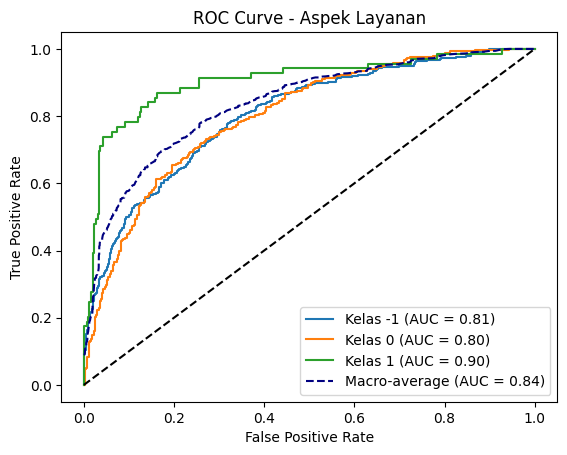


📊 ROC-AUC untuk aspek: Transaksi


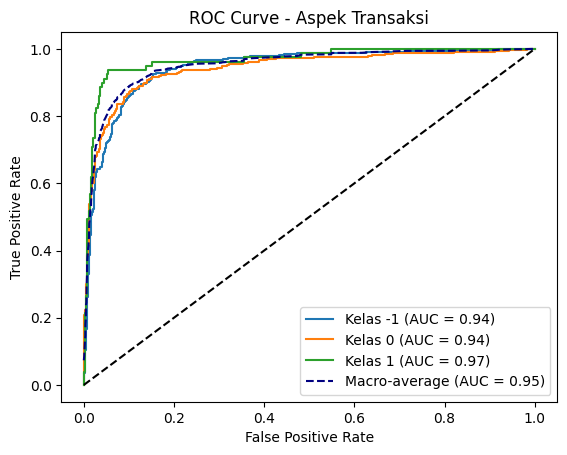


📊 ROC-AUC untuk aspek: Performa Aplikasi


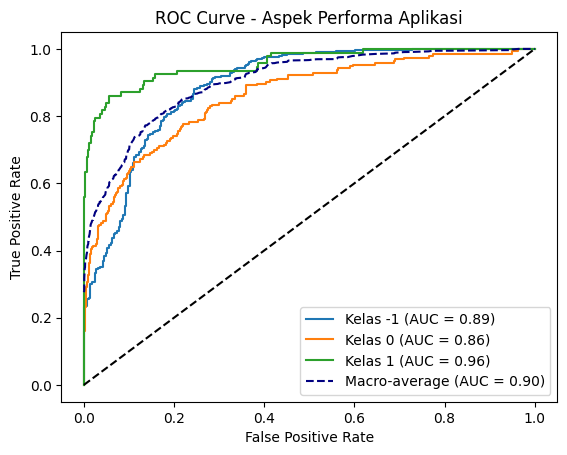


📊 ROC-AUC untuk aspek: Keamanan


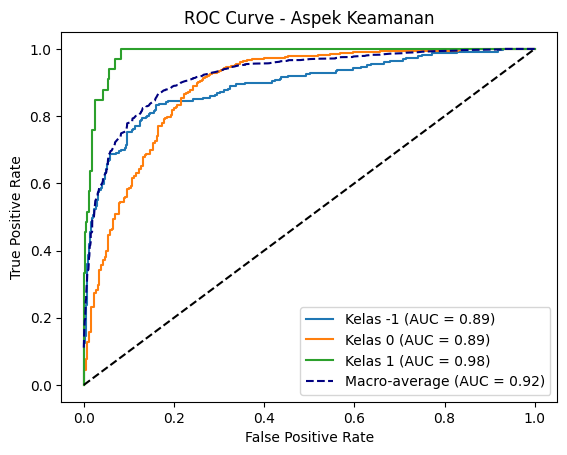

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# ROC-AUC untuk setiap aspek
for aspect in aspek_list:
    print(f"\n📊 ROC-AUC untuk aspek: {aspect}")
    
    # Target
    y_aspect = y_train[aspect].values
    
    # Binarisasi label untuk multi-class ROC
    classes = np.unique(y_aspect)
    y_bin = label_binarize(y_aspect, classes=classes)
    n_classes = y_bin.shape[1]

    # Prediksi skor dengan decision_function
    y_score = cross_val_predict(pipeline, X_array, y_aspect, cv=10,
                                method='decision_function')

    # Hitung AUC ROC per kelas
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Macro-average AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i],
                 label=f'Kelas {classes[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot(fpr["macro"], tpr["macro"],
             label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})',
             color='navy', linestyle='--')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Aspek {aspect}")
    plt.legend(loc="lower right")
    plt.show()

# 7. Klasifikasi SVM

In [26]:
import joblib
import numpy as np
from sklearn.metrics import classification_report

# Daftar aspek
aspects = ['Layanan', 'Transaksi', 'Performa Aplikasi', 'Keamanan']

# Sinkronisasi index TF-IDF dan label uji
tfidf_df_test = tfidf_df_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Konversi TF-IDF test ke array numpy
X_test_np = tfidf_df_test.to_numpy()

# Dictionary untuk menyimpan hasil
predictions = {}

for aspect in aspects:
    print(f"\n📌 Melakukan prediksi untuk aspek: {aspect}")

    # Muat model terbaik hasil training
    model_path = f"svm_model_{aspect}_ovo_tuned_5fold.joblib"
    try:
        model = joblib.load(model_path)
    except FileNotFoundError:
        print(f"❌ Model untuk aspek {aspect} tidak ditemukan di: {model_path}")
        continue

    # Ambil label y_test untuk aspek ini
    y_test_aspect_full = y_test[aspect]
    valid_idx = ~y_test_aspect_full.isna()

    X_test_aspect = X_test_np[valid_idx]
    y_test_aspect = y_test_aspect_full[valid_idx].to_numpy()

    # Prediksi data uji
    y_pred = model.predict(X_test_aspect)

    # Karena OvO tidak punya predict_proba, pakai decision_function
    try:
        y_score = model.decision_function(X_test_aspect)
    except AttributeError:
        y_score = None  # fallback kalau model tidak support decision_function

    # Simpan hasil prediksi
    predictions[aspect] = {
        'y_true': y_test_aspect,
        'y_pred': y_pred,
        'y_score': y_score
    }


📌 Melakukan prediksi untuk aspek: Layanan

📌 Melakukan prediksi untuk aspek: Transaksi

📌 Melakukan prediksi untuk aspek: Performa Aplikasi

📌 Melakukan prediksi untuk aspek: Keamanan


# 8. Evaluasi Akhir


📌 Evaluasi aspek: Layanan
🔹 Akurasi: 75.48%
              precision    recall  f1-score   support

          -1       0.60      0.54      0.57       135
           0       0.81      0.85      0.83       351
           1       0.67      0.62      0.65        32

    accuracy                           0.75       518
   macro avg       0.69      0.67      0.68       518
weighted avg       0.75      0.75      0.75       518



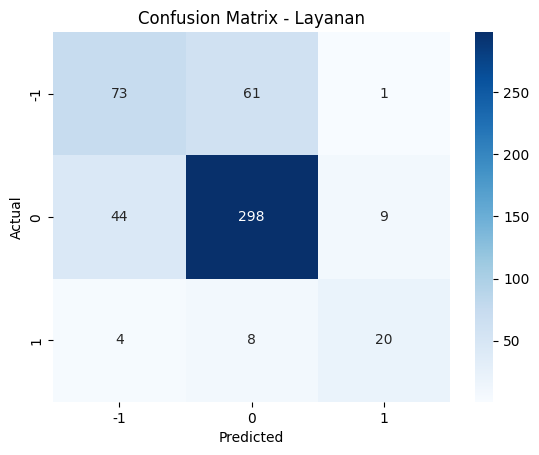


📌 Evaluasi aspek: Transaksi
🔹 Akurasi: 87.26%
              precision    recall  f1-score   support

          -1       0.82      0.80      0.81       130
           0       0.91      0.94      0.92       347
           1       0.71      0.54      0.61        41

    accuracy                           0.87       518
   macro avg       0.81      0.76      0.78       518
weighted avg       0.87      0.87      0.87       518



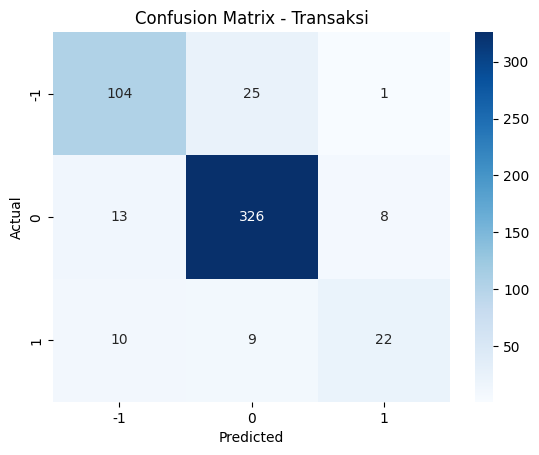


📌 Evaluasi aspek: Performa Aplikasi
🔹 Akurasi: 81.27%
              precision    recall  f1-score   support

          -1       0.83      0.94      0.88       371
           0       0.65      0.45      0.54        99
           1       0.93      0.54      0.68        48

    accuracy                           0.81       518
   macro avg       0.80      0.65      0.70       518
weighted avg       0.81      0.81      0.80       518



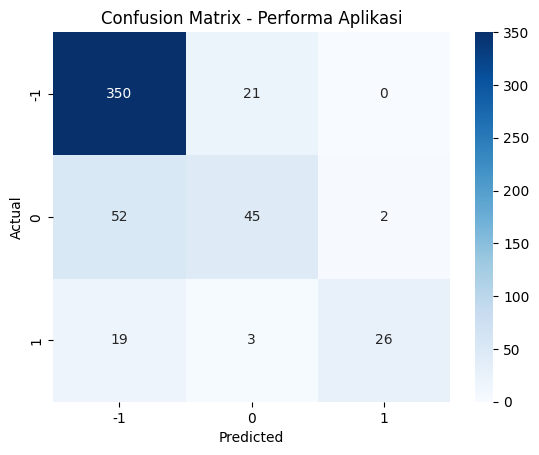


📌 Evaluasi aspek: Keamanan
🔹 Akurasi: 89.38%
              precision    recall  f1-score   support

          -1       0.91      0.66      0.77       121
           0       0.89      0.98      0.93       382
           1       0.89      0.53      0.67        15

    accuracy                           0.89       518
   macro avg       0.90      0.73      0.79       518
weighted avg       0.89      0.89      0.89       518



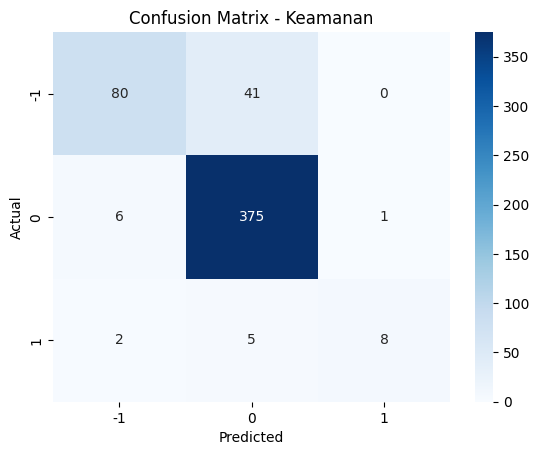

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = [-1, 0, 1]  # Label kelas

# Evaluasi dan visualisasi untuk setiap aspek
for aspect in predictions:
    print(f"\n📌 Evaluasi aspek: {aspect}")

    y_true = predictions[aspect]['y_true']
    y_pred = predictions[aspect]['y_pred']

    # Akurasi
    acc = accuracy_score(y_true, y_pred) * 100
    print(f"🔹 Akurasi: {acc:.2f}%")

    # Classification report
    print(classification_report(y_true, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {aspect}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()